In [1]:
weather = ['Sunny','Sunny','Overcast',
           'Rainy','Rainy','Rainy',
           'Overcast','Sunny','Sunny',
           'Rainy','Sunny','Overcast',
          'Overcast','Rainy']

temp = ['Hot','Hot','Hot',
       'Mild','Cool','Cool',
       'Cool','Mild','Cool',
       'Mild','Mild','Mild',
       'Hot','Mild']

play = ['No','No','Yes',
        'Yes','Yes','No',
        'Yes','No','Yes',
        'Yes','Yes','Yes',
       'Yes','No']

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
weather_encoded=le.fit_transform(weather)
print(weather_encoded) #0 overcast 1 rainy 2 sunny

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [4]:
temp_encoded = le.fit_transform(temp)
label=le.fit_transform(play)

print('Temp:',temp_encoded) # 0 cool 1 mild 2 hot
print('Play:',label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [5]:
features = list(zip(weather_encoded, temp_encoded))
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [15]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(features,label)

predicted = model.predict([
    [0,2],
    [1,1],
    [0,0],
    [2,2],
    [1,0],
    [0,1],
    [2,0],
    ])
print('Predicted Value:',predicted) # 1 yes 0 no

Predicted Value: [1 1 1 0 1 1 0]


In [7]:
from sklearn import datasets
wine = datasets.load_wine()

In [8]:
print('Feature:', wine.feature_names)
print('Labels:', wine.target_names)

Feature: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels: ['class_0' 'class_1' 'class_2']


In [9]:
wine.data.shape

(178, 13)

In [10]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [11]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target, 
                                test_size=0.3, random_state=109)

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)

In [72]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9074074074074074


In [73]:
from sklearn import datasets
wine = datasets.load_wine()

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']

pima = pd.read_csv(r'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv',header=None, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [5]:
numer = ['pregnant','insulin','bmi','age','glucose','bp','pedigree','label',]

for col in numer:
    pima[col] =pd.to_numeric(pima[col], errors='coerce')

In [6]:
pima.dropna(inplace=True)

In [7]:
feature_cols = ['pregnant','insulin','bmi',
                'age','glucose','bp','pedigree','label',]
X = pima[feature_cols]
y = pima.label

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [16]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [17]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [28]:
!pip install graphviz -y


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


In [18]:
!pip install pydotplus

In [14]:
!conda install python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.



In [19]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [16]:
!pip install pydotplus

In [20]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hans8626\Anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38haa244fe_0         3.1 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_2
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.1-py38haa95532_1 --> conda-forge::conda-4.10.

In [21]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf,
    out_file = dot_data,
    class_names = ['0','1'],
    feature_names = feature_cols,
    filled=True,
    rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

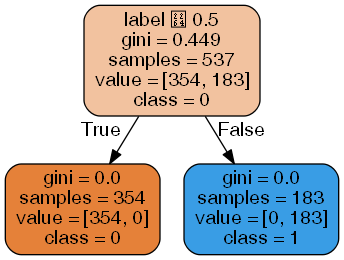

In [22]:
Image(graph.create_png())

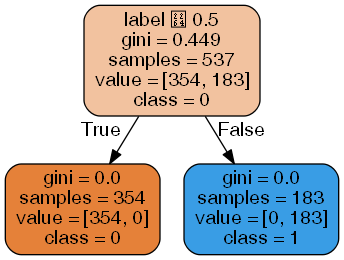

In [13]:
Image(graph.create_png())